# Chapter 8

In [1]:
import pandas as pd


In [4]:
oo = pd.read_csv('../data/olympics.csv',skiprows=4)

In [5]:
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


# Athletes winning medals in Beijing Olympics 100m or 200m track event

In [9]:
mw =oo[(oo.Edition ==2008)&((oo.Event =='100m')|(oo.Event =='200m'))]
mw

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27551,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,100m,M,Bronze
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold
27553,Beijing,2008,Athletics,Athletics,"THOMPSON, Richard",TRI,Men,100m,M,Silver
27554,Beijing,2008,Athletics,Athletics,"FRASER, Shelly-ann",JAM,Women,100m,W,Gold
27555,Beijing,2008,Athletics,Athletics,"SIMPSON, Sherone",JAM,Women,100m,W,Silver
27556,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,100m,W,Silver
27569,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,200m,M,Bronze
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold
27571,Beijing,2008,Athletics,Athletics,"CRAWFORD, Shawn",USA,Men,200m,M,Silver
27572,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,200m,W,Bronze


In [11]:
g=mw.groupby(['NOC','Gender','Event','Discipline']).size()
g

NOC  Gender  Event  Discipline
JAM  Men     100m   Athletics     1
             200m   Athletics     1
     Women   100m   Athletics     3
             200m   Athletics     2
TRI  Men     100m   Athletics     1
USA  Men     100m   Athletics     1
             200m   Athletics     2
     Women   200m   Athletics     1
dtype: int64

In [14]:
df =g.unstack(['Discipline','Event'])

# Stack()

In [15]:
df

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

In [16]:
df.stack()

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

In [17]:
df.stack('Event')

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

# Unstack()

In [18]:
df

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

In [19]:
df.unstack()

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

In [20]:
df.unstack('Gender')

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

# Challenge

In [21]:
### Plot the number of gold medals won by the USA male and female athletes throughout the history of the Olympics?

<AxesSubplot:xlabel='Edition'>

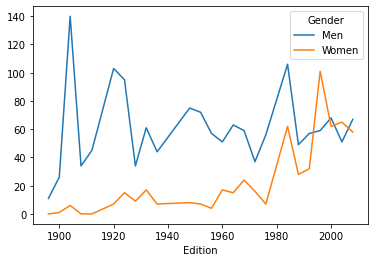

In [27]:
gu = oo[(oo.NOC =='USA') &(oo.Medal =='Gold')]
gu.groupby(['Edition','Gender']).size().unstack('Gender',fill_value =0).plot()

# Plot the 5 athletes who have won the most gold medals over the history of the Olympics. When there is a tie, consider the number of silver medals, then bronze medals.

<AxesSubplot:xlabel='Athlete'>

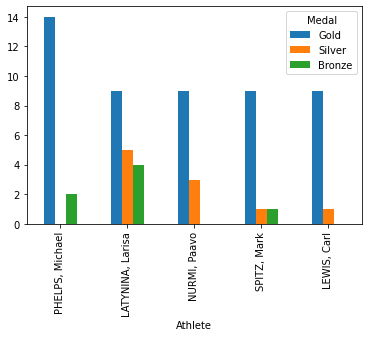

In [43]:
g= oo.groupby(['Athlete','Medal']).size().unstack('Medal',fill_value =0)
g.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']].head().plot(kind='bar')